There are 25 variables:

ID: ID of each client<br>
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit<br>
SEX: Gender (1=male, 2=female)<br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE: Marital status (1=married, 2=single, 3=others)<br>
AGE: Age in years<br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
PAY_2: Repayment status in August, 2005 (scale same as above)<br>
PAY_3: Repayment status in July, 2005 (scale same as above)<br>
PAY_4: Repayment status in June, 2005 (scale same as above)<br>
PAY_5: Repayment status in May, 2005 (scale same as above)<br>
PAY_6: Repayment status in April, 2005 (scale same as above)<br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)<br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)<br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)<br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)<br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)<br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)<br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)<br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)<br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)<br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)<br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)<br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)<br>
default.payment.next.month: Default payment (1=yes, 0=no)<br>

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [4]:
# dropping 'ID'
data.drop(columns='ID', inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


## EDA

In [7]:
cat_cols = data.iloc[:,:-1].select_dtypes('int64').columns
num_cols = data.iloc[:,:-1].select_dtypes('float64').columns
len(num_cols), len(cat_cols)

(13, 10)

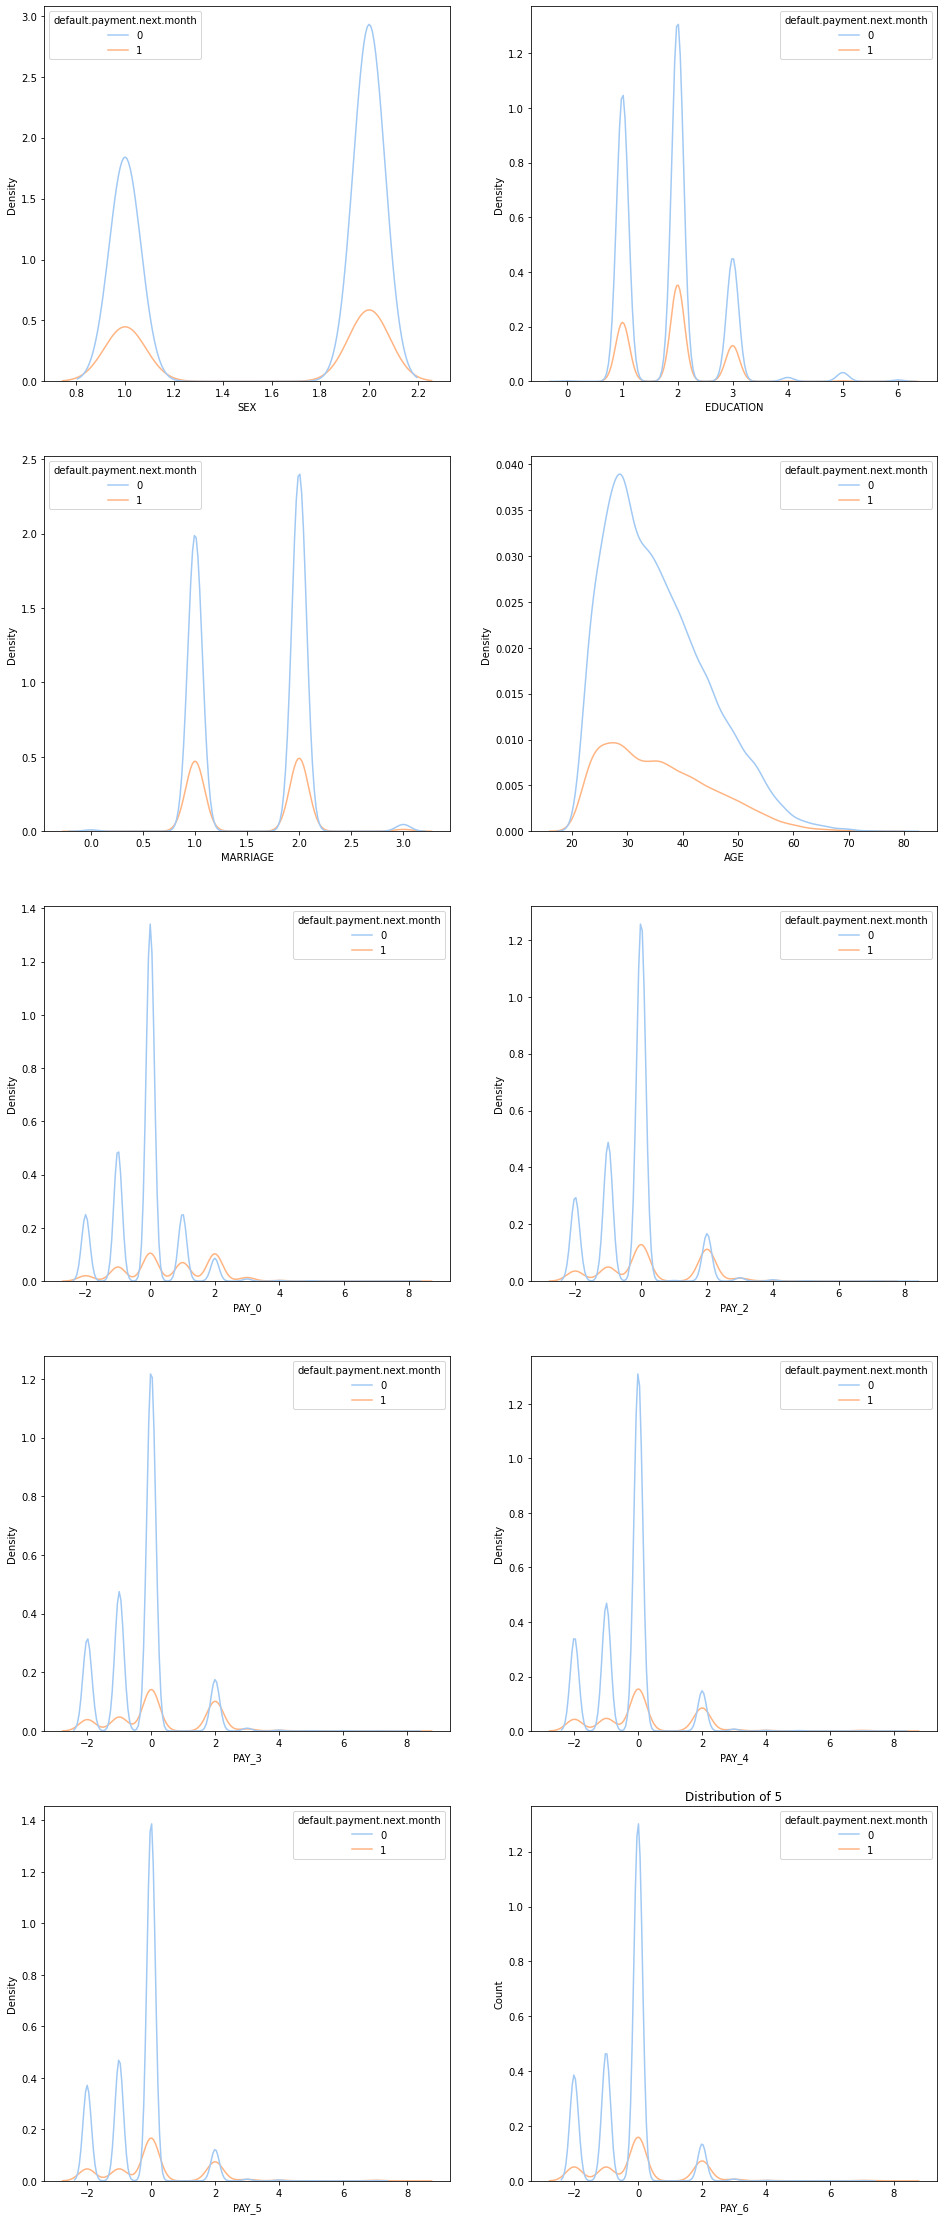

In [8]:
i = 0
j = 0
fig, ax = plt.subplots(5,2, figsize=(16, 40))
for cols in cat_cols:    
    sns.kdeplot(data=data, x=cols, palette="pastel", hue="default.payment.next.month",legend=True, ax = ax[i][j])
    if j:
        i = i + 1
        j = 0
    else:
        j = 1
    plt.title(f"Distribution of {i}")
    plt.xlabel(cols)
    plt.ylabel("Count")

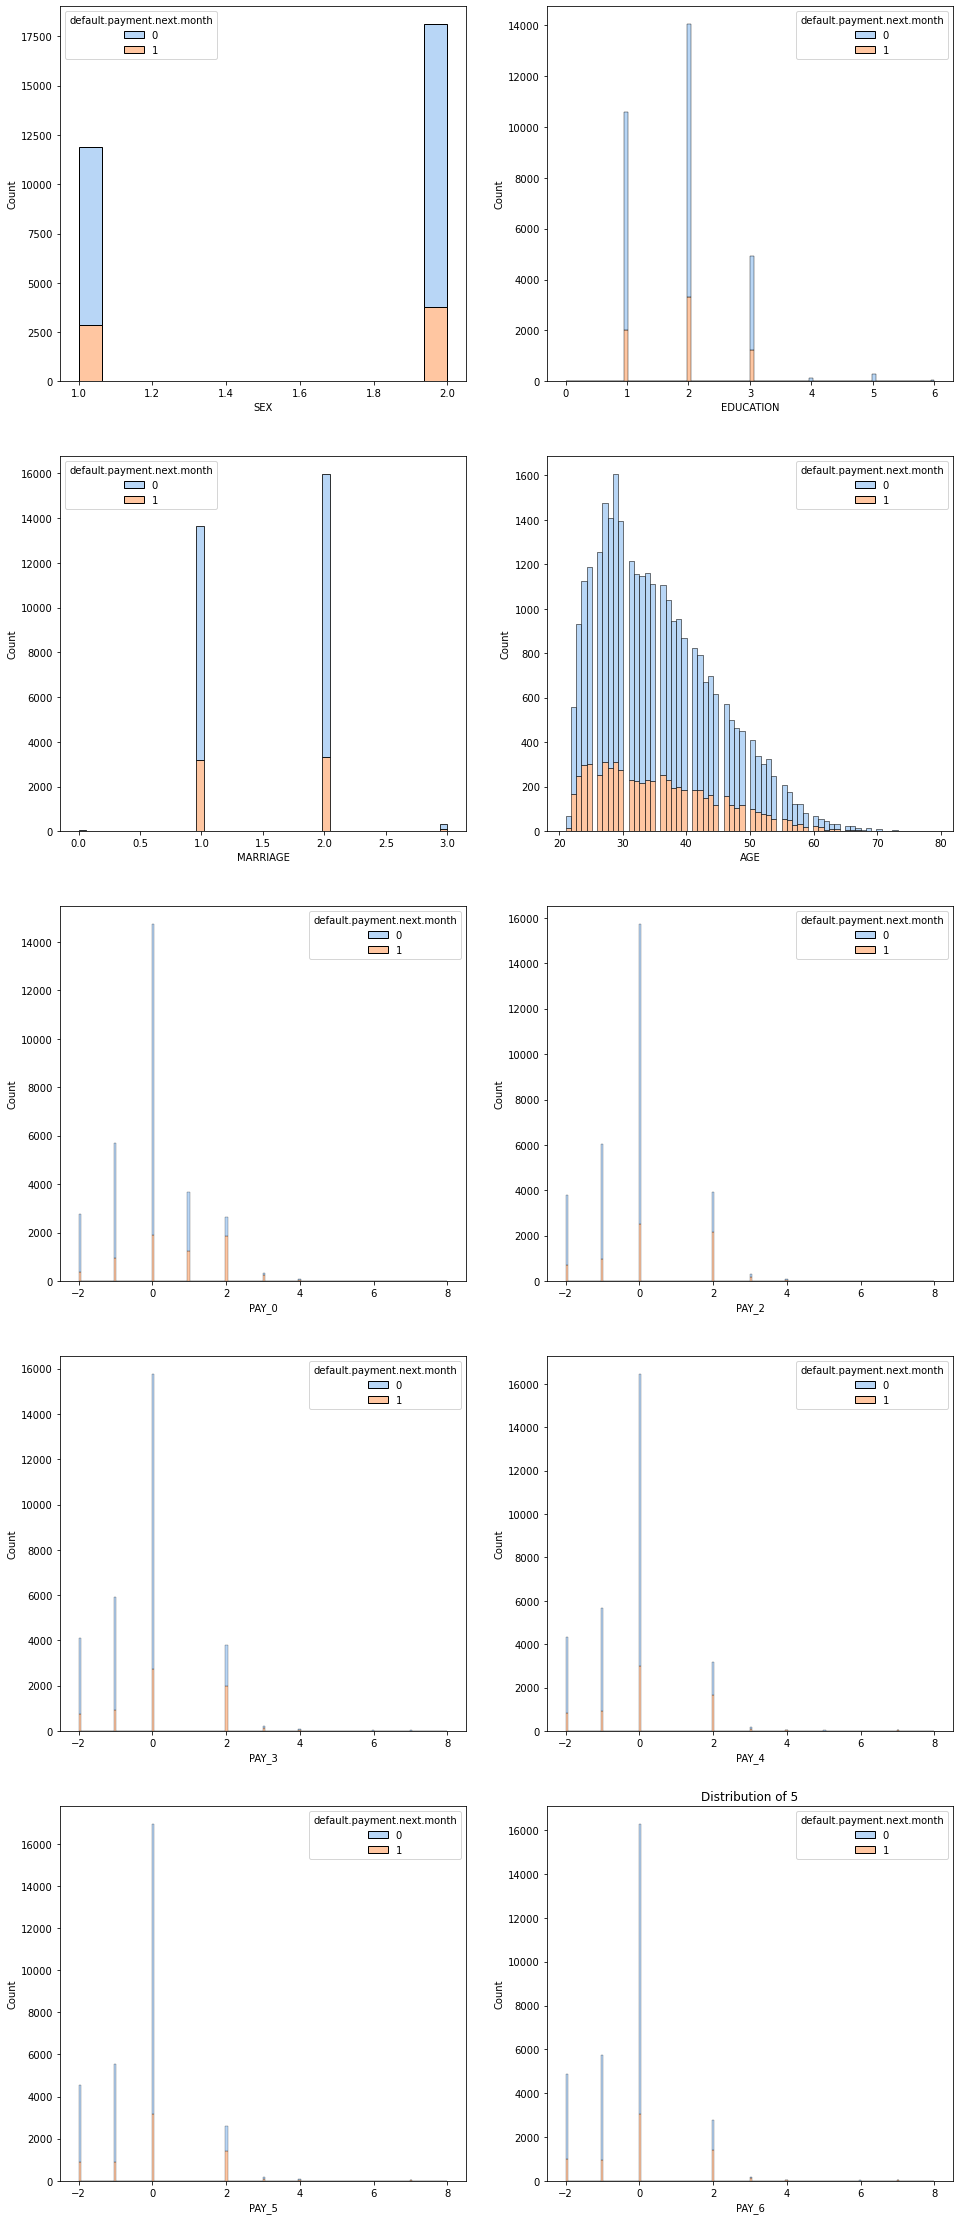

In [9]:
i = 0
j = 0
fig, ax = plt.subplots(5,2, figsize=(16, 40))
for cols in cat_cols:    
    sns.histplot(data=data, stat="count", multiple="stack", x=cols, kde=False, palette="pastel", hue="default.payment.next.month",
                 element="bars", legend=True, ax = ax[i][j])
    if j:
        i = i + 1
        j = 0
    else:
        j = 1
    plt.title(f"Distribution of {i}")
    plt.xlabel(cols)
    plt.ylabel("Count")

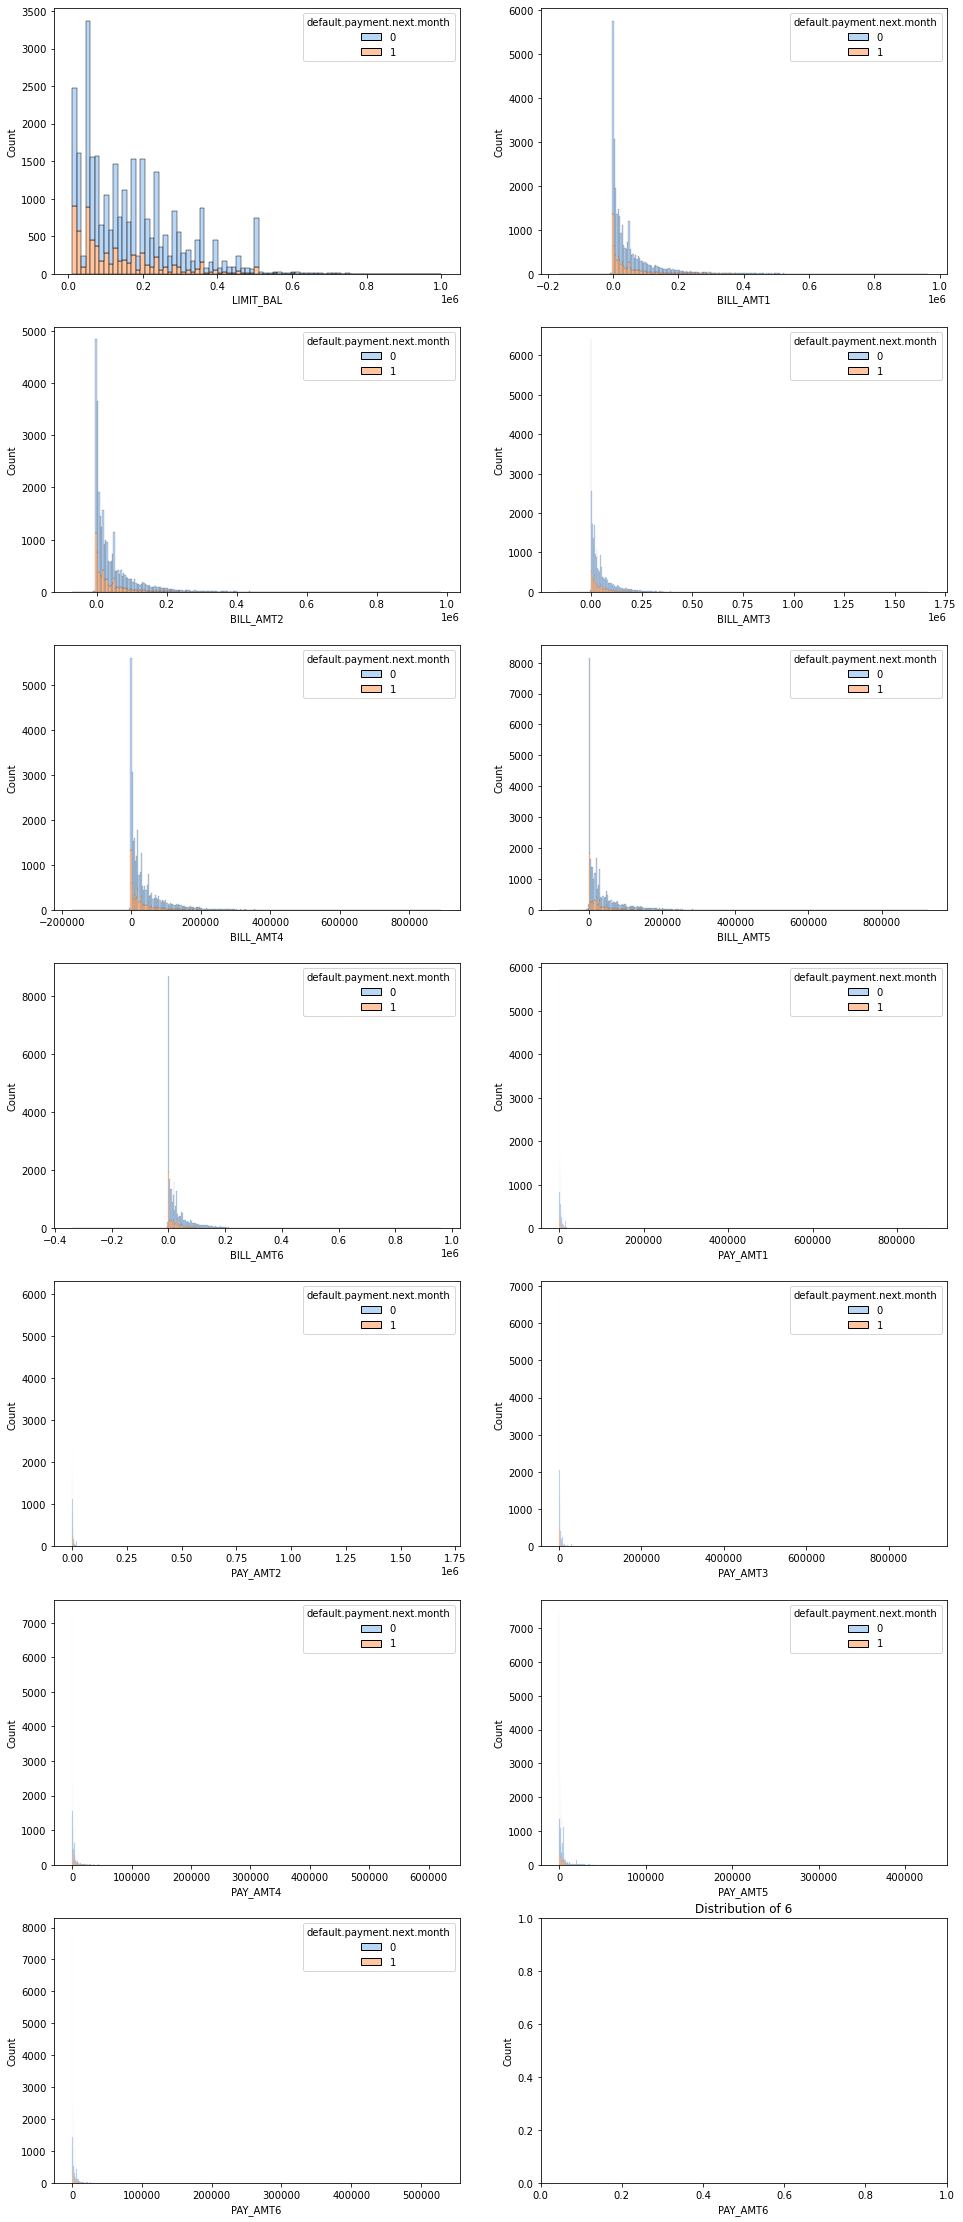

In [10]:
i = 0
j = 0
fig, ax = plt.subplots(7,2, figsize=(16, 40))
for cols in num_cols:    
    sns.histplot(data=data, stat="count", multiple="stack", x=cols, palette="pastel", hue="default.payment.next.month",
                 element="bars", legend=True, ax = ax[i][j])
    if j:
        i = i + 1
        j = 0
    elif i ==7 and j:
        break
    else:
        j = 1
        
    plt.title(f"Distribution of {i}")
    plt.xlabel(cols)
    plt.ylabel("Count")

In [11]:
skewed_cols = data.loc[:,num_cols].columns[data.loc[:,num_cols].skew()>1]
for i in skewed_cols:
    data[i+'_Logged'] = data[i].apply(lambda x: np.log1p(x) if x>0 else -np.log1p(-x))
    data.drop(columns=i, inplace = True)

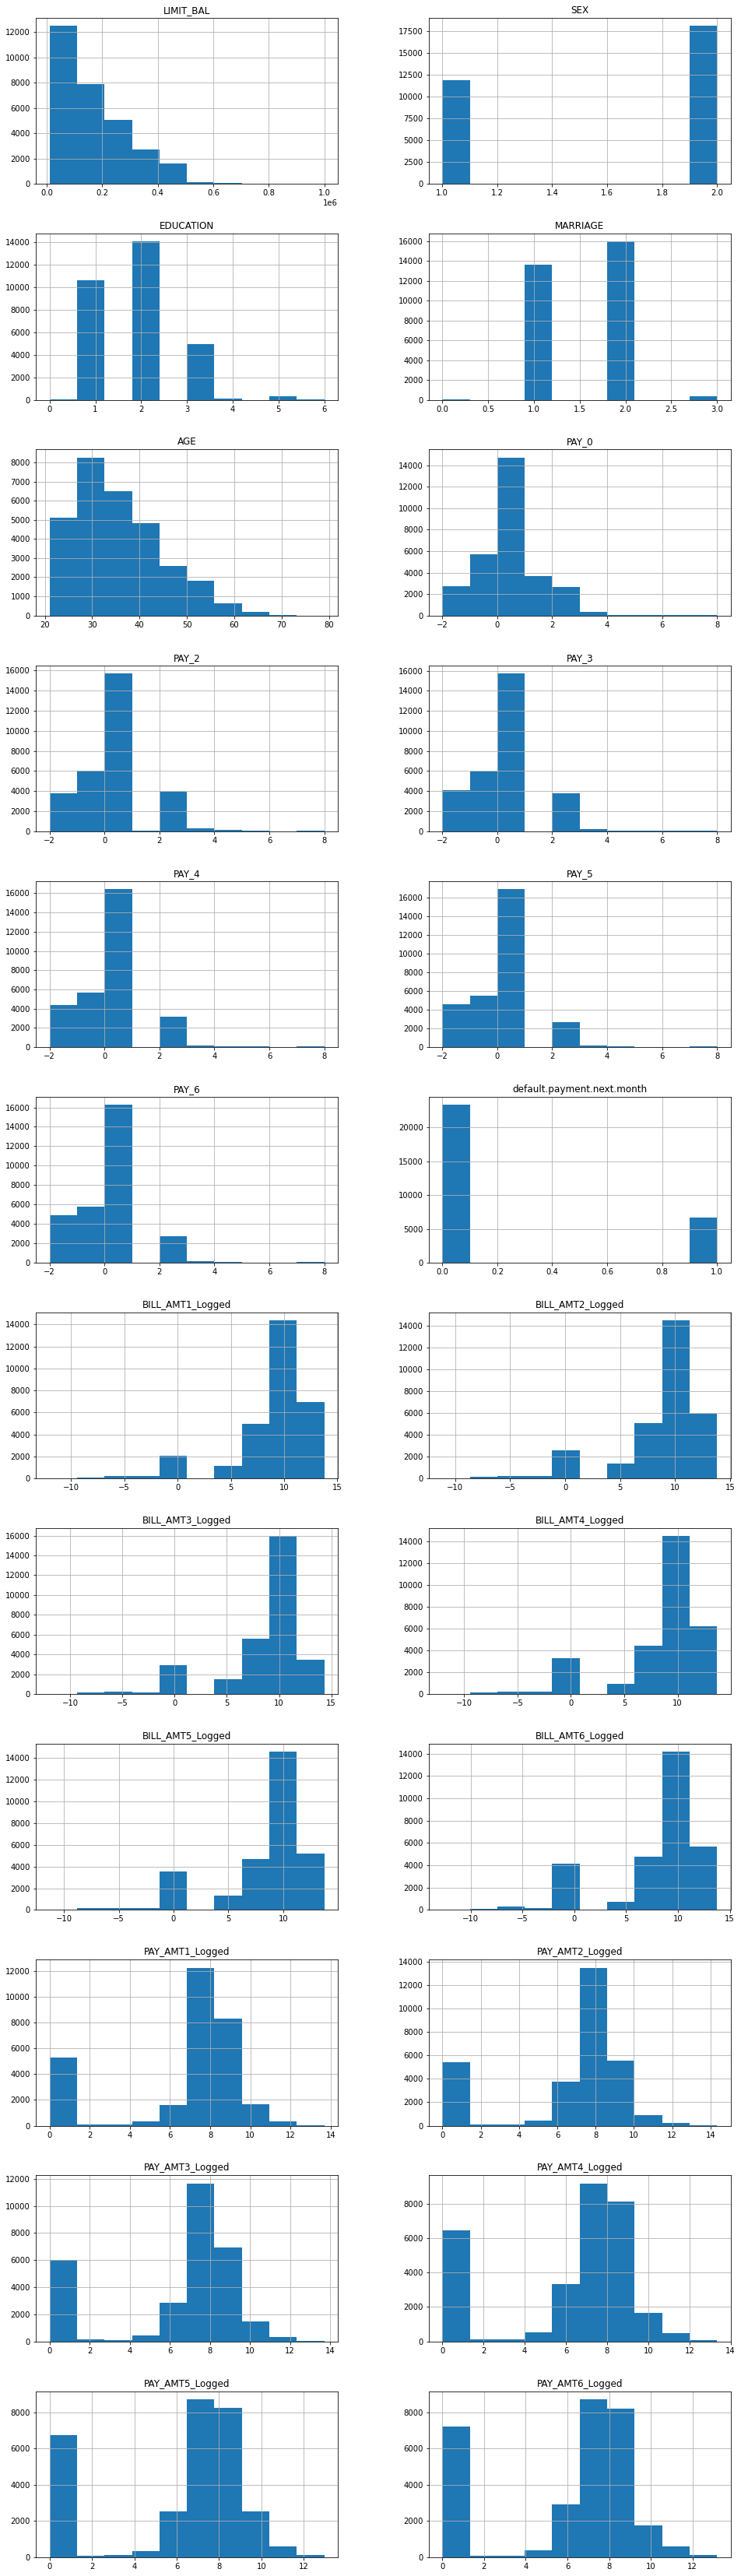

In [12]:
data.hist(figsize=(16, 60), layout=(12,2));

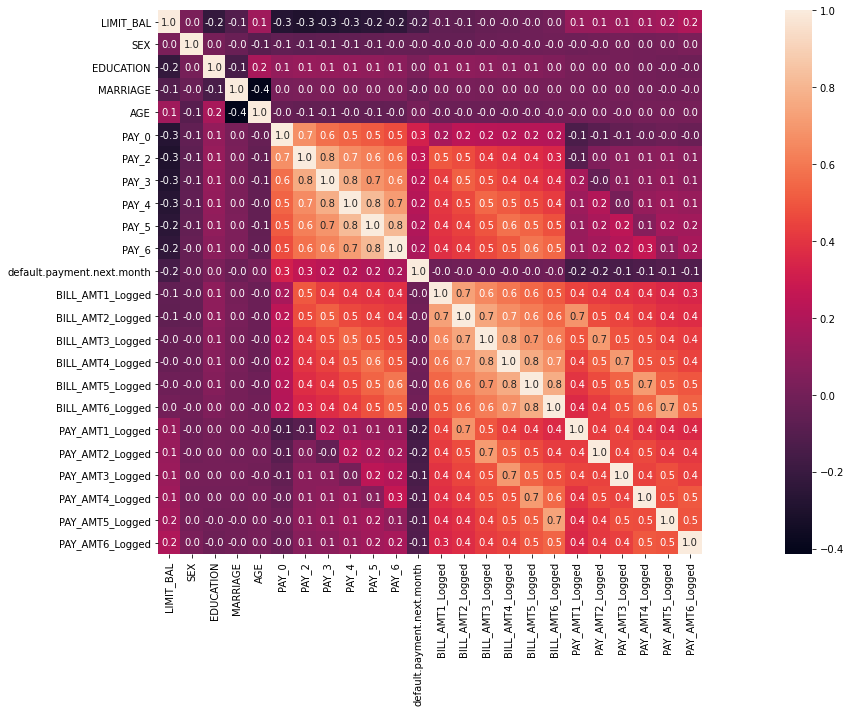

In [13]:
plt.subplots(figsize=(30,10))
sns.heatmap(data.corr(), square=True, annot=True, fmt=".1f")
plt.show()

In [14]:
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

## Model Buliding

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='default.payment.next.month'),
                                                    data['default.payment.next.month'], test_size=0.2)

*Scaling Features*

In [16]:
scaler = MinMaxScaler()
X_train.iloc[:, -12:] = scaler.fit_transform(X_train.iloc[:, -12:])
X_test.iloc[:, -12:] = scaler.transform(X_test.iloc[:, -12:])

def plot_confusion(prediction):
    conmat = np.array(confusion_matrix(y_test, prediction, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['True Default', 'True not Default'], 
                             columns=['Predicted default', 'Predicted not Default'])
    print(confusion)

**Logistic Regression**

In [17]:
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7830416666666666

In [18]:
lr.score(X_test, y_test)

0.7771666666666667

In [19]:
y_lr_pred = lr.predict(X_test)

In [20]:
plot_confusion(y_lr_pred)

                  Predicted default  Predicted not Default
True Default                     32                   1323
True not Default                 14                   4631


In [21]:
print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4645
           1       0.70      0.02      0.05      1355

    accuracy                           0.78      6000
   macro avg       0.74      0.51      0.46      6000
weighted avg       0.76      0.78      0.69      6000



**Random Forest Classifier**

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9994166666666666

In [23]:
rf.score(X_test, y_test)

0.8105

In [24]:
y_rf_pred = rf.predict(X_test)

In [25]:
plot_confusion(y_rf_pred)

                  Predicted default  Predicted not Default
True Default                    494                    861
True not Default                276                   4369


In [26]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4645
           1       0.64      0.36      0.46      1355

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



**XGBoost**

In [27]:
xgb = XGBClassifier(objective = "binary:logistic", eval_metric = "logloss", n_jobs=-1, random_state=0)
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

0.881625

In [28]:
xgb.score(X_test, y_test)

0.8143333333333334

In [29]:
y_xgb_pred = xgb.predict(X_test)

In [30]:
plot_confusion(y_xgb_pred)

                  Predicted default  Predicted not Default
True Default                    501                    854
True not Default                260                   4385


In [31]:
plot_confusion(y_xgb_pred)

                  Predicted default  Predicted not Default
True Default                    501                    854
True not Default                260                   4385


In [32]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4645
           1       0.66      0.37      0.47      1355

    accuracy                           0.81      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.81      0.79      6000



## Implementing Various Sampling Methods

In [33]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *

In [34]:
# defining a function that resamples the data and fits a classifier. It returns the score and FNR for testing data.
def score(sampler, classifier, X_train, X_test, y_train, y_test):
    
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train,y_train)
    classifier.fit(X_train_resampled, y_train_resampled)
    
    pred = classifier.predict_proba(X_train_resampled)
    print('For Training set:')
    print('roc-logloss score: {}'.format(roc_auc_score(y_train_resampled, pred[:,1])))
    print()
    
    pred = classifier.predict_proba(X_test)
    print('For Testing set:')
    print('roc-logloss score on Testing set: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    
    print('Confusion Matrix:')
    mat = confusion_matrix(y_test, classifier.predict(X_test))
    print(pd.DataFrame(mat, columns = ['Predicted Not Default', 'Predicted Default'], 
                       index=['True Not Default','True Default'])) 
    FNR = mat[1,0]/(mat[1,0]+mat[1,1])
    print()
    
    print('Classification report:')
    print(classification_report(y_test, classifier.predict(X_test)))
    
    return roc_auc_score(y_test, pred[:,1]), FNR

In [35]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [36]:
test_scores = {}
test_fnr = {}

In [37]:
# For unsampled data
xgb.fit(X_train, y_train)

pred = xgb.predict_proba(X_train)
print('For Training set:')
print('roc-logloss score: {}'.format(roc_auc_score(y_train, pred[:,1])))
print()

print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_train, xgb.predict(X_train)),
                               columns = ['Predicted Not Default', 'Predicted Default'], 
                       index=['True Not Default','True Default'])) 
print()
print('-'*100)
print()

pred = xgb.predict_proba(X_test)

print('For Testing set:')
print('roc-logloss score: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()

print('Confusion Matrix:')
mat = confusion_matrix(y_test, xgb.predict(X_test))
print(pd.DataFrame(mat, columns = ['Predicted Not Default', 'Predicted Default'], 
                       index=['True Not Default','True Default'])) 
FNR = mat[1,0]/(mat[1,0]+mat[1,1])
print()

print('Classification report for the Testing set:')
print(classification_report(y_test, xgb.predict(X_test)))

test_scores['Unsampled'],  test_fnr['Unsampled'] = roc_auc_score(y_test, pred[:,1]),FNR

For Training set:
roc-logloss score: 0.9353413739485754

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                  18312                407
True Default                       2434               2847

----------------------------------------------------------------------------------------------------

For Testing set:
roc-logloss score: 0.77494754904492

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   4385                260
True Default                        854                501

Classification report for the Testing set:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4645
           1       0.66      0.37      0.47      1355

    accuracy                           0.81      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.81      0.79      6000



### Undersampling Algorithms

**Random Under Sampler**

In [38]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [39]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=0, replacement=True)

test_scores['UnderRandom'], test_fnr['UnderRandom'] = score(rus, xgb, X_train, X_test, y_train, y_test) 

For Training set:
roc-logloss score: 0.9761874779056845

For Testing set:
roc-logloss score on Testing set: 0.7690411862137997

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3242               1403
True Default                        409                946

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      4645
           1       0.40      0.70      0.51      1355

    accuracy                           0.70      6000
   macro avg       0.65      0.70      0.65      6000
weighted avg       0.78      0.70      0.72      6000



**Tomek Links**

In [40]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [41]:
TL = TomekLinks(sampling_strategy='auto',
               n_jobs=-1)


test_scores['TL'], test_fnr['TL'] = score(TL, xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9463101835125984

For Testing set:
roc-logloss score on Testing set: 0.7702845181304342

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   4322                323
True Default                        801                554

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4645
           1       0.63      0.41      0.50      1355

    accuracy                           0.81      6000
   macro avg       0.74      0.67      0.69      6000
weighted avg       0.80      0.81      0.80      6000



**Edited Nearest Neighbours**

In [42]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [43]:
ENN = EditedNearestNeighbours(sampling_strategy='auto',
                              n_neighbors=3,
                              kind_sel='all',
                              n_jobs=-1)

test_scores['ENN'], test_fnr['ENN'] = score(ENN, xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9707171733978285

For Testing set:
roc-logloss score on Testing set: 0.777184211885176

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3933                712
True Default                        602                753

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4645
           1       0.51      0.56      0.53      1355

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.70      6000
weighted avg       0.79      0.78      0.78      6000



**Repeated Edited Nearest Neighbours**

In [44]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [45]:
RENN = RepeatedEditedNearestNeighbours(sampling_strategy='auto', 
                                       n_neighbors=3,
                                       kind_sel='all',
                                       n_jobs=-1,
                                       max_iter=100)


test_scores['RENN'], test_fnr['RENN'] =  score(RENN, xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9822617793189906

For Testing set:
roc-logloss score on Testing set: 0.7772307643420892

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3530               1115
True Default                        484                871

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      4645
           1       0.44      0.64      0.52      1355

    accuracy                           0.73      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.73      0.75      6000



**All K Nearest Neighbour**

In [46]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [47]:
AKNN = AllKNN(sampling_strategy='auto',
              n_neighbors=3,
              kind_sel = 'all',
              n_jobs = -1)



test_scores['AKNN'], test_fnr['AKNN'] = score(AKNN, xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9760908456379385

For Testing set:
roc-logloss score on Testing set: 0.7781836597698593

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3819                826
True Default                        553                802

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4645
           1       0.49      0.59      0.54      1355

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000



**Neighbourhood Cleaning Rule**

In [48]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [49]:
NCR = NeighbourhoodCleaningRule(sampling_strategy='auto',
                                n_neighbors=3,
                                kind_sel='all',
                                n_jobs=-1,
                                threshold_cleaning=0.5
                               )


test_scores['NCR'], test_fnr['NCR'] =  score(NCR,xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9692449824012261

For Testing set:
roc-logloss score on Testing set: 0.7685796336973059

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3948                697
True Default                        602                753

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4645
           1       0.52      0.56      0.54      1355

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.70      6000
weighted avg       0.79      0.78      0.79      6000



### Oversampling Algorithms

**Random Oversampling**

In [50]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [51]:
ros = RandomOverSampler(sampling_strategy='auto',
                       random_state=0)

test_scores['OverRandom'], test_fnr['OverRandom'] = score(ros, xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9474034347753972

For Testing set:
roc-logloss score on Testing set: 0.7672775948426869

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3807                838
True Default                        561                794

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4645
           1       0.49      0.59      0.53      1355

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.78      0.77      0.77      6000



**SMOTE**

In [52]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [53]:
smote = SMOTE(sampling_strategy='auto',
            random_state=0,
             k_neighbors=5,
             n_jobs=-1,)

test_scores['SMOTE'], test_fnr['SMOTE'] = score(smote, xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9613744766527625

For Testing set:
roc-logloss score on Testing set: 0.7392235431503938

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3986                659
True Default                        738                617

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4645
           1       0.48      0.46      0.47      1355

    accuracy                           0.77      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.76      0.77      0.76      6000



**Borderline SMOTE Variant 1**

In [54]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [55]:
bls = BorderlineSMOTE(sampling_strategy='auto',
                     random_state=0,
                    k_neighbors=5,
                    m_neighbors=10,
                    n_jobs=-1,
                    kind='borderline-1')

test_scores['BorderV1'], test_fnr['BorderV1'] = score(bls, xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9625057549428353

For Testing set:
roc-logloss score on Testing set: 0.7328842265817707

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3954                691
True Default                        737                618

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4645
           1       0.47      0.46      0.46      1355

    accuracy                           0.76      6000
   macro avg       0.66      0.65      0.66      6000
weighted avg       0.76      0.76      0.76      6000



**Borderline SMOTE Variant 2**

In [56]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [57]:
bls2= BorderlineSMOTE(sampling_strategy='auto',
                     random_state=0,
                    k_neighbors=5,
                    m_neighbors=10,
                    n_jobs=-1,
                    kind='borderline-2')

test_scores['BorderV2'], test_fnr['BorderV2'] = score(bls2, xgb, X_train, X_test, y_train, y_test)

For Training set:
roc-logloss score: 0.9673442348236027

For Testing set:
roc-logloss score on Testing set: 0.7410883424227138

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   4075                570
True Default                        764                591

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4645
           1       0.51      0.44      0.47      1355

    accuracy                           0.78      6000
   macro avg       0.68      0.66      0.66      6000
weighted avg       0.77      0.78      0.77      6000



**KMEANS SMOTE**

In [58]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [59]:
from sklearn.cluster import KMeans

kms = KMeansSMOTE(sampling_strategy='auto',
                  random_state=0,
                  k_neighbors=2,
                  n_jobs=-1,
                  kmeans_estimator=KMeans(n_clusters=2, random_state=0),
                 cluster_balance_threshold=0.1,
                 density_exponent='auto')

test_scores['KMEANSMOTE'], test_fnr['KMEANSMOTE'] = score(kms, xgb, X_train, X_test, y_train, y_test)  

For Training set:
roc-logloss score: 0.9675563998003766

For Testing set:
roc-logloss score on Testing set: 0.7492121433593238

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   4008                637
True Default                        712                643

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4645
           1       0.50      0.47      0.49      1355

    accuracy                           0.78      6000
   macro avg       0.68      0.67      0.67      6000
weighted avg       0.77      0.78      0.77      6000



**ADASYN**

In [60]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [61]:
ada = ADASYN(sampling_strategy='auto',
            random_state=0,
            n_neighbors=5,
            n_jobs=-1)

test_scores['ADASYN'], test_fnr['ADASYN'] = score(ada, xgb, X_train, X_test, y_train, y_test)  

For Training set:
roc-logloss score: 0.9603751515351537

For Testing set:
roc-logloss score on Testing set: 0.7295849602198928

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3926                719
True Default                        735                620

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4645
           1       0.46      0.46      0.46      1355

    accuracy                           0.76      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.76      0.76      0.76      6000



### Combination of Over and Under sampling

In [62]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

**SMOTEENN**

In [63]:
smenn = SMOTEENN(sampling_strategy='auto',
                 random_state= 0,
                 smote= smote,
                 enn= ENN,
                 n_jobs=-1)

test_scores['SMOTEENN'], test_fnr['SMOTEENN'] = score(smenn, xgb, X_train, X_test, y_train, y_test)  

For Training set:
roc-logloss score: 0.9790755224328896

For Testing set:
roc-logloss score on Testing set: 0.7464472769593142

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   4253                392
True Default                        835                520

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      4645
           1       0.57      0.38      0.46      1355

    accuracy                           0.80      6000
   macro avg       0.70      0.65      0.67      6000
weighted avg       0.78      0.80      0.78      6000



**SMOTETomek**

In [64]:
rf = RandomForestClassifier(n_jobs=-1, random_state = 1)

In [65]:
smt = SMOTETomek(sampling_strategy='auto',
                 random_state= 0,
                 smote= smote,
                 tomek= TL,
                 n_jobs=-1)

test_scores['SMOTETomek'], test_fnr['SMOTETomek'] = score(smt, xgb, X_train, X_test, y_train, y_test)  

For Training set:
roc-logloss score: 0.9662988005317654

For Testing set:
roc-logloss score on Testing set: 0.735313613416005

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   4029                616
True Default                        739                616

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4645
           1       0.50      0.45      0.48      1355

    accuracy                           0.77      6000
   macro avg       0.67      0.66      0.67      6000
weighted avg       0.77      0.77      0.77      6000



## Comparing different Algorithms

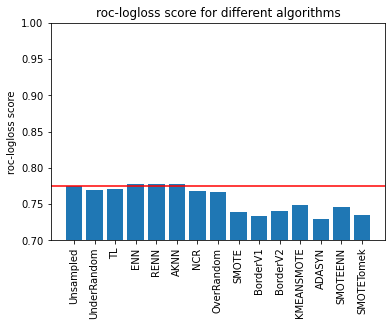

The 5 best scoring algorithms are: AKNN, RENN, ENN, Unsampled, TL


In [66]:
plt.bar(test_scores.keys(),test_scores.values())
plt.axhline(test_scores['Unsampled'], color='r')
plt.xticks(rotation=90)
plt.ylabel('roc-logloss score')
plt.title('roc-logloss score for different algorithms')
plt.ylim(0.7,1)
plt.show()
print('The 5 best scoring algorithms are: ',end='')
print(*pd.DataFrame.from_dict(test_scores, orient='index', columns=['Score']).sort_values(by='Score',ascending=False).index[:5].values, sep=', ')

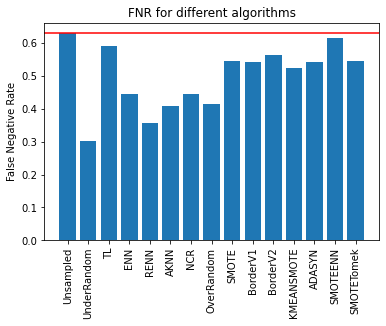

In [67]:
plt.bar(test_fnr.keys(),test_fnr.values())
plt.axhline(test_fnr['Unsampled'], color='r')
plt.xticks(rotation=90)
plt.ylabel('False Negative Rate')
plt.title('FNR for different algorithms')
plt.show()

### Choosing RENN and hyperparameter tuning

In [68]:
RENN = RepeatedEditedNearestNeighbours(sampling_strategy='auto', 
                                       n_neighbors=3,
                                       kind_sel='all',
                                       n_jobs=-1,
                                       max_iter=200)

X_train_resampled, y_train_resampled = RENN.fit_resample(X_train,y_train)

In [69]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
class_weight = [None, 'balanced']
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

In [70]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 1), 
                               param_distributions = random_grid,
                               n_iter = 500,
                               cv = 3,
                               verbose=10,
                               random_state=42,
                               n_jobs = -1,
                               scoring='roc_auc')
rf_random.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 1

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, scoring='roc

In [71]:
best_model = rf_random.best_estimator_
pred = best_model.predict_proba(X_train_resampled)
print('For Training set:')
print('roc-logloss score: {}'.format(roc_auc_score(y_train_resampled, pred[:,1])))
print()

print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_train_resampled, best_model.predict(X_train_resampled)), 
                       columns = ['Predicted Not Default', 'Predicted Default'], 
                       index=['True Not Default','True Default'])) 

For Training set:
roc-logloss score: 0.9926268874202127

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   8534                253
True Default                        343               4938


In [72]:
pred = best_model.predict_proba(X_test)

print('For Testing set:')
print('roc-logloss score: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()

print('Confusion Matrix:')
mat = confusion_matrix(y_test, best_model.predict(X_test))
print(pd.DataFrame(mat, columns = ['Predicted Not Default', 'Predicted Default'], 
                        index=['True Not Default','True Default'])) 
FNR = mat[1,0]/(mat[1,0]+mat[1,1])
print()

print('Classification report for the Testing set:')
print(classification_report(y_test, best_model.predict(X_test)))

For Testing set:
roc-logloss score: 0.7808212616033587

Confusion Matrix:
                  Predicted Not Default  Predicted Default
True Not Default                   3584               1061
True Default                        470                885

Classification report for the Testing set:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4645
           1       0.45      0.65      0.54      1355

    accuracy                           0.74      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.74      0.76      6000



**Saving the model**

In [73]:
import pickle
pickle.dump(best_model, open('CC_Default_predictor.pkl','wb') )